# Question 3 Notebook 


## a\)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data  
y = iris.target 
data = pd.DataFrame(X, columns=iris.feature_names)
data['species'] = y
print(data)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     species  
0          0

## b\)

In [ ]:


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#Split dataset into training (60%) and test (40%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# Step 2: Normalization (Min-Max Scaling)
min_max_scaler = MinMaxScaler()
X_train_norm = min_max_scaler.fit_transform(X_train)
X_test_norm = min_max_scaler.transform(X_test)

#Standardization (Z-score Normalization)
standard_scaler = StandardScaler()
X_train_std = standard_scaler.fit_transform(X_train)
X_test_std = standard_scaler.transform(X_test)

X_train_unprocessed = X_train.copy()
X_test_unprocessed = X_test.copy()

y_train_one_hot = pd.get_dummies(pd.Series(y_train)).values  
y_test_one_hot = pd.get_dummies(pd.Series(y_test)).values   

# Store all three variations in a dictionary
preprocessed_data = {
    "Normalized Training Data": X_train_norm,
    "Standardized Training Data": X_train_std,
    "Unprocessed Training Data": X_train_unprocessed
}

df_norm = pd.DataFrame(X_train_norm, columns=iris.feature_names)
df_std = pd.DataFrame(X_train_std, columns=iris.feature_names)
df_unprocessed = pd.DataFrame(X_train_unprocessed, columns=iris.feature_names)
df_y_train_one_hot = pd.DataFrame(y_train_one_hot, columns=["Class 0", "Class 1", "Class 2"])




In [ ]:

#Implement Softmax Function
def softmax(logits):
    """
    Applies the softmax function to a set of logits.

    Parameters:
    logits (numpy array): Array of raw scores or logits.

    Returns:
    numpy array: Softmax-transformed probabilities.
    """
    exp_logits = np.exp(logits - np.max(logits, axis=1, keepdims=True))  # Subtract max for numerical stability
    return exp_logits / np.sum(exp_logits, axis=1, keepdims=True)




In [ ]:


#Implement Categorical Cross-Entropy Loss Function
def categorical_cross_entropy(y_true, y_pred):
    """
    Computes the categorical cross-entropy loss.

    Parameters:
    y_true (numpy array): One-hot encoded true labels (shape: [m, k]).
    y_pred (numpy array): Predicted probabilities from softmax (shape: [m, k]).

    Returns:
    float: The average cross-entropy loss.
    """
    m = y_true.shape[0]  # Number of samples
    loss = -np.sum(y_true * np.log(y_pred + 1e-9)) / m  # Adding a small value for numerical stability
    return loss





In [5]:
def train_multiclass_logistic_regression_gd(X, y, num_classes, learning_rate=0.01, epochs=1000):
    """
    Trains a Multiclass Logistic Regression model using Batch Gradient Descent.

    Parameters:
    X (numpy array): Feature matrix (m x n).
    y (numpy array): One-hot encoded labels (m x k).
    num_classes (int): Number of classes (k).
    learning_rate (float): Learning rate for gradient descent.
    epochs (int): Number of training epochs.

    Returns:
    W (numpy array): Learned weight matrix (n x k).
    b (numpy array): Learned bias vector (1 x k).
    loss_history (list): Loss at each epoch.
    """
    m, n = X.shape  # Number of samples (m) and features (n)
    W = np.random.randn(n, num_classes) * 0.01  # Initialize weights
    b = np.zeros((1, num_classes))  # Initialize bias
    loss_history = []

    for epoch in range(epochs):
        # Compute logits
        logits = np.dot(X, W) + b

        # Apply softmax to get probabilities
        probs = softmax(logits)

        # Compute loss
        loss = categorical_cross_entropy(y, probs)
        loss_history.append(loss)

        # Compute gradients
        dW = np.dot(X.T, (probs - y)) / m
        db = np.sum(probs - y, axis=0, keepdims=True) / m

        # Update weights and biases
        W -= learning_rate * dW
        b -= learning_rate * db

        # Print loss every 100 epochs
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")

    return W, b, loss_history

# Train the model using Gradient Descent (GD)
W_gd, b_gd, loss_history_gd = train_multiclass_logistic_regression_gd(X_train_std, y_train_one_hot, num_classes=3)


Epoch 0, Loss: 1.1083
Epoch 100, Loss: 0.6410
Epoch 200, Loss: 0.5130
Epoch 300, Loss: 0.4509
Epoch 400, Loss: 0.4121
Epoch 500, Loss: 0.3846
Epoch 600, Loss: 0.3635
Epoch 700, Loss: 0.3465
Epoch 800, Loss: 0.3323
Epoch 900, Loss: 0.3201


In [6]:
def train_multiclass_logistic_regression_sgd(X, y, num_classes, learning_rate=0.01, epochs=1000):
    """
    Trains a Multiclass Logistic Regression model using Stochastic Gradient Descent.

    Parameters:
    X (numpy array): Feature matrix (m x n).
    y (numpy array): One-hot encoded labels (m x k).
    num_classes (int): Number of classes (k).
    learning_rate (float): Learning rate for gradient descent.
    epochs (int): Number of training epochs.

    Returns:
    W (numpy array): Learned weight matrix (n x k).
    b (numpy array): Learned bias vector (1 x k).
    loss_history (list): Loss at each epoch.
    """
    m, n = X.shape
    W = np.random.randn(n, num_classes) * 0.01
    b = np.zeros((1, num_classes))
    loss_history = []

    for epoch in range(epochs):
        epoch_loss = 0
        for i in range(m):  # Iterate over samples
            xi = X[i].reshape(1, -1)
            yi = y[i].reshape(1, -1)

            # Compute logits and probabilities
            logits = np.dot(xi, W) + b
            probs = softmax(logits)

            # Compute loss
            loss = categorical_cross_entropy(yi, probs)
            epoch_loss += loss

            # Compute gradients
            dW = np.dot(xi.T, (probs - yi))
            db = np.sum(probs - yi, axis=0, keepdims=True)

            # Update weights and biases
            W -= learning_rate * dW
            b -= learning_rate * db

        # Store average loss per epoch
        loss_history.append(epoch_loss / m)

        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss_history[-1]:.4f}")

    return W, b, loss_history

# Train the model using Stochastic Gradient Descent (SGD)
W_sgd, b_sgd, loss_history_sgd = train_multiclass_logistic_regression_sgd(X_train_std, y_train_one_hot, num_classes=3)


Epoch 0, Loss: 0.8445
Epoch 100, Loss: 0.1197
Epoch 200, Loss: 0.0865
Epoch 300, Loss: 0.0727
Epoch 400, Loss: 0.0647
Epoch 500, Loss: 0.0593
Epoch 600, Loss: 0.0554
Epoch 700, Loss: 0.0523
Epoch 800, Loss: 0.0498
Epoch 900, Loss: 0.0477


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def evaluate_model(X_test, y_test, W, b):
    """
    Evaluates the trained model on the test set.

    Parameters:
    X_test (numpy array): Test feature matrix.
    y_test (numpy array): True one-hot encoded labels.
    W (numpy array): Learned weight matrix.
    b (numpy array): Learned bias vector.

    Returns:
    None
    """
    logits_test = np.dot(X_test, W) + b
    probs_test = softmax(logits_test)
    y_pred = np.argmax(probs_test, axis=1)
    y_true = np.argmax(y_test, axis=1)

    # Compute accuracy
    accuracy = accuracy_score(y_true, y_pred)

    # Generate classification report
    class_report = classification_report(y_true, y_pred, target_names=iris.target_names)

    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)

    # Display results
    print("Accuracy:", accuracy)
    print("\nClassification Report:\n", class_report)
    print("\nConfusion Matrix:\n", conf_matrix)

# Evaluate the GD model
print("\n### Evaluation: Gradient Descent Model ###")
evaluate_model(X_test_std, y_test_one_hot, W_gd, b_gd)

# Evaluate the SGD model
print("\n### Evaluation: Stochastic Gradient Descent Model ###")
evaluate_model(X_test_std, y_test_one_hot, W_sgd, b_sgd)



### Evaluation: Gradient Descent Model ###
Accuracy: 0.8833333333333333

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        20
  versicolor       0.84      0.80      0.82        20
   virginica       0.81      0.85      0.83        20

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60


Confusion Matrix:
 [[20  0  0]
 [ 0 16  4]
 [ 0  3 17]]

### Evaluation: Stochastic Gradient Descent Model ###
Accuracy: 0.9333333333333333

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        20
  versicolor       0.86      0.95      0.90        20
   virginica       0.94      0.85      0.89        20

    accuracy                           0.93        60
   macro avg       0.94      0.93      0.93        60
weighted avg       0.94      

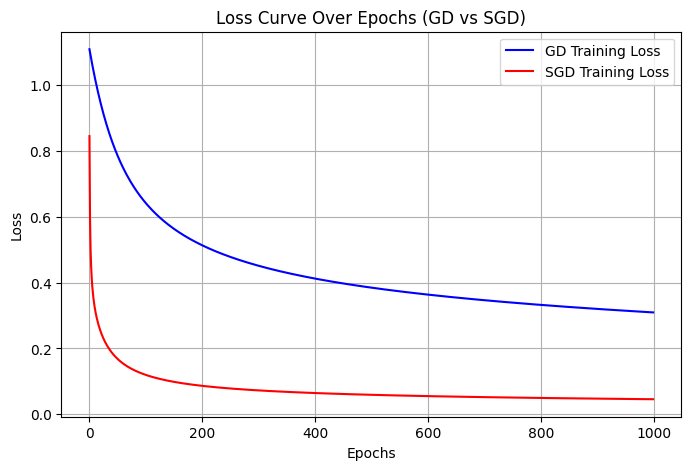

In [ ]:


# Plot loss curves for both models
plt.figure(figsize=(8, 5))
plt.plot(np.arange(len(loss_history_gd)), loss_history_gd, label="GD Training Loss", color='blue')
plt.plot(np.arange(len(loss_history_sgd)), loss_history_sgd, label="SGD Training Loss", color='red')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve Over Epochs (GD vs SGD)")
plt.legend()
plt.grid(True)
plt.show()
